In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Rahel\Moonlight-Energy-Optimization\notebooks


In [3]:
df = pd.read_csv(r'C:\Users\Rahel\Moonlight-Energy-Optimization\data\togo-dapaong_qc.csv')

print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [4]:
# Summary statistics for numerical columns
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [5]:
# Summary for all columns, including object types
print(df.describe(include='all'))


               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-10-24 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.400000     215.700000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  

In [6]:
# Count of missing values in each column
print(df.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
# Missing value percentage per column
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [8]:
# Combined missing value count and percentage
missing_report = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
})
print(missing_report)

               Missing Count  Missing %
Timestamp                  0        0.0
GHI                        0        0.0
DNI                        0        0.0
DHI                        0        0.0
ModA                       0        0.0
ModB                       0        0.0
Tamb                       0        0.0
RH                         0        0.0
WS                         0        0.0
WSgust                     0        0.0
WSstdev                    0        0.0
WD                         0        0.0
WDstdev                    0        0.0
BP                         0        0.0
Cleaning                   0        0.0
Precipitation              0        0.0
TModA                      0        0.0
TModB                      0        0.0
Comments              525600      100.0


In [9]:
# Loop through numerical columns and identify outliers using IQR
numerical_cols = df.select_dtypes(include=['number']).columns

outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = len(outlier_rows)

# Show number of outliers per column
print("Outlier count per numerical column:")
print(outliers)


Outlier count per numerical column:
{'GHI': 1303, 'DNI': 50586, 'DHI': 7905, 'ModA': 1237, 'ModB': 1537, 'Tamb': 0, 'RH': 0, 'WS': 8708, 'WSgust': 7377, 'WSstdev': 14669, 'WD': 0, 'WDstdev': 6921, 'BP': 19228, 'Cleaning': 281, 'Precipitation': 3338, 'TModA': 137, 'TModB': 573, 'Comments': 0}


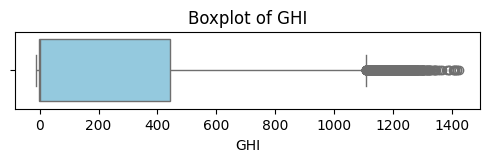

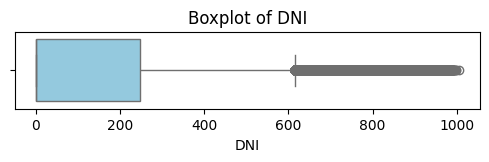

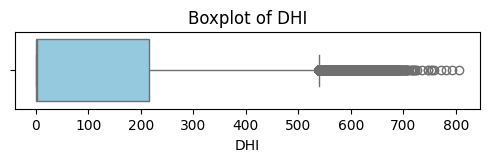

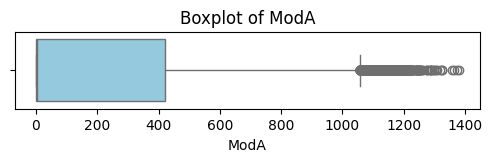

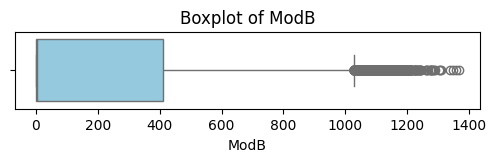

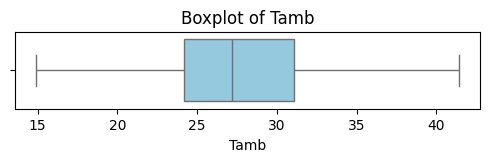

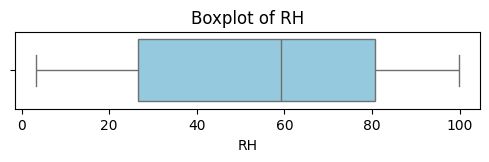

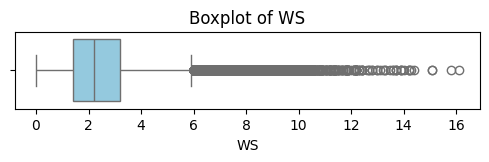

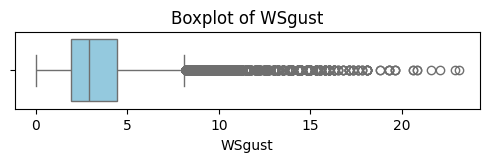

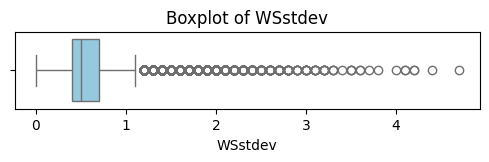

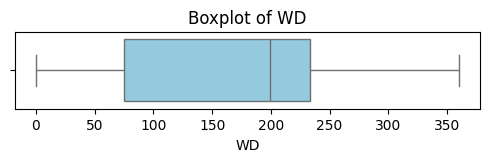

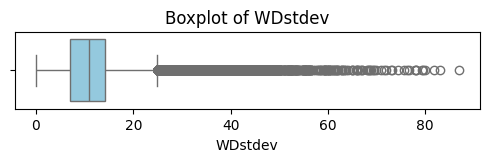

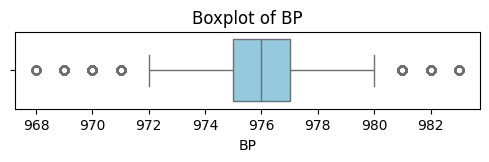

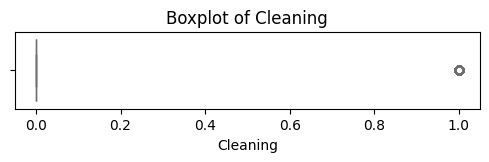

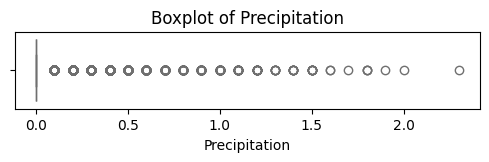

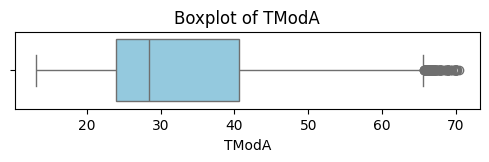

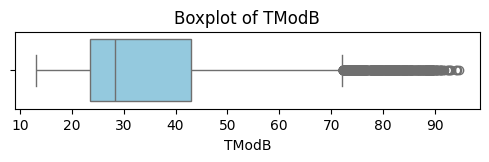

ValueError: List of boxplot statistics and `positions` values must have same the length

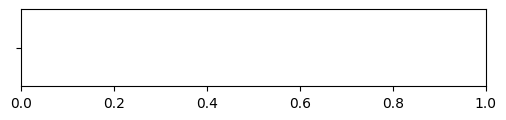

In [10]:
# Boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()